In [3]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = 'data/crypto/BTCUSDT.csv'
df = pd.read_csv(path)
df

,timestamp_utc,timestamp,open,high,low,close,volume,turnover
0,2020-03-25 10:30:08.128000+00:00,1585132200000,6500.0,6500.0,6500.0,6500.0,0.002,1.300000e+01
1,2020-03-25 10:45:25.632000+00:00,1585133100000,6500.0,6591.5,6500.0,6591.5,0.002,1.318300e+01
2,2020-03-25 11:00:43.136000+00:00,1585134000000,6591.5,6622.5,6585.5,6590.5,37.803,2.491407e+05
3,2020-03-25 11:16:00.640000+00:00,1585134900000,6590.5,6628.5,6588.5,6618.0,141.338,9.353749e+05
4,2020-03-25 11:29:07.072000+00:00,1585135800000,6618.0,6618.0,6457.5,6499.5,120.703,7.845091e+05
...,...,...,...,...,...,...,...,...
132798,2024-01-07 17:59:02.400000+00:00,1704650400000,44070.9,44150.0,44037.9,44118.0,519.299,2.290517e+07
132799,2024-01-07 18:14:19.904000+00:00,1704651300000,44118.0,44173.3,44100.0,44113.8,326.239,1.439852e+07
132800,2024-01-07 18:29:37.408000+00:00,1704652200000,44113.8,44184.9,44108.8,44158.3,366.902,1.620259e+07
132801,2024-01-07 18:44:54.912000+00:00,1704653100000,44158.3,44189.9,44093.5,44106.5,602.564,2.659858e+07


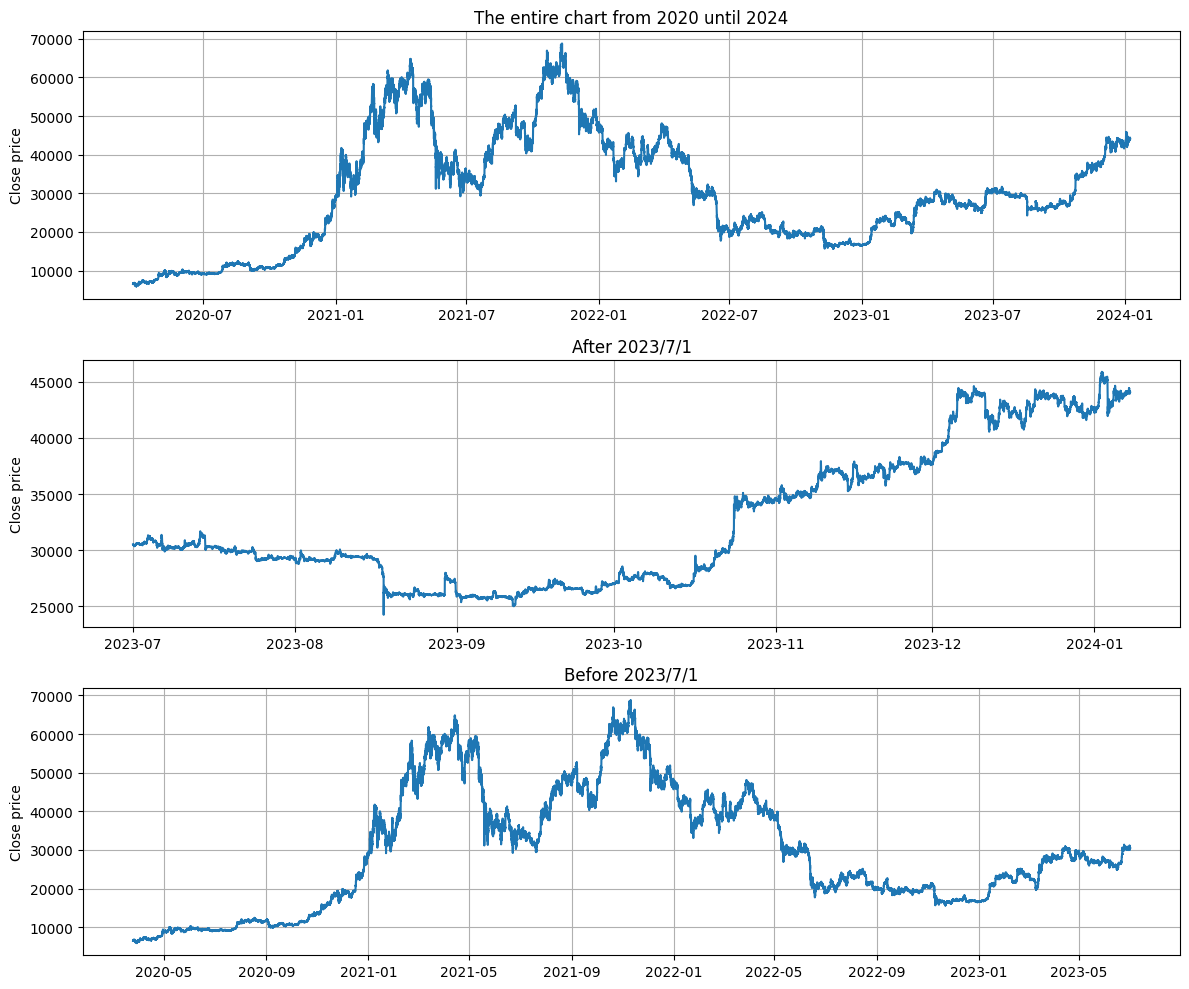

132803
18324
114478


In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
axes = axes.flatten()

cut_date = int(dt.datetime(2023, 7, 1).timestamp() * 1000)

y = df['close']
x = [dt.datetime.fromtimestamp(timestamp) for timestamp in (df['timestamp'] / 1000)]

axes[0].plot(x, y)
axes[0].grid(True)
axes[0].set_ylabel('Close price')
axes[0].set_xlabel(None)
axes[0].set_title('The entire chart from 2020 until 2024')

after_cut_date = df[df['timestamp'] > cut_date]
before_cut_date = df[df['timestamp'] < cut_date]

y_after_cut_date = after_cut_date['close']
x_after_cut_date = [dt.datetime.fromtimestamp(timestamp) for timestamp in (after_cut_date['timestamp'] / 1000)]

axes[1].plot(x_after_cut_date, y_after_cut_date)
axes[1].grid(True)
axes[1].set_ylabel('Close price')
axes[1].set_xlabel(None)
axes[1].set_title('After 2023/7/1')

y_before_cut_date = before_cut_date['close']
x_before_cut_date = [dt.datetime.fromtimestamp(timestamp) for timestamp in (before_cut_date['timestamp'] / 1000)]

axes[2].plot(x_before_cut_date, y_before_cut_date)
axes[2].grid(True)
axes[2].set_ylabel('Close price')
axes[2].set_xlabel(None)
axes[2].set_title('Before 2023/7/1')

plt.tight_layout()
plt.show()

print(len(y))
print(len(y_after_cut_date))
print(len(y_before_cut_date))

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [11]:
########### TEST TRAIN ###########
data = df.filter(['close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95 ))

training_data_len

126163

In [12]:
# training_data = before_cut_date.filter(['close'])
# training_dataset = training_data.values

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(training_dataset)

########### TEST TRAIN ###########
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00996749],
       [0.01142208],
       [0.01140618],
       ...,
       [0.60862577],
       [0.6078023 ],
       [0.60747323]])

In [13]:
train_data = scaled_data[0:len(training_dataset), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00996749, 0.01142208, 0.01140618, 0.01184335, 0.00995954,
       0.01015031, 0.01046825, 0.01027748, 0.0107385 , 0.0112949 ,
       0.01174002, 0.01152541, 0.01309922, 0.01131875, 0.01092927,
       0.01141413, 0.01153336, 0.01139823, 0.01206591, 0.01220898,
       0.01176386, 0.01179566, 0.01197848, 0.01300384, 0.01292435,
       0.01258257, 0.01263821, 0.01249513, 0.01253487, 0.01235206,
       0.01173207, 0.01173207, 0.01161284, 0.0123918 , 0.01231231,
       0.01205796, 0.0115413 , 0.01190694, 0.01149361, 0.01184335,
       0.01185925, 0.01139823, 0.01146977, 0.01118362, 0.0113108 ,
       0.01136644, 0.01228052, 0.01261436, 0.01282102, 0.01284487,
       0.01241565, 0.0123759 , 0.0126859 , 0.01312307, 0.01366357,
       0.01383049, 0.01363972, 0.01375895, 0.01316281, 0.01305153])]
[0.013385369886097176]

[array([0.00996749, 0.01142208, 0.01140618, 0.01184335, 0.00995954,
       0.01015031, 0.01046825, 0.01027748, 0.0107385 , 0.0112949 ,
       0.01174002, 0.01152541, 0.0

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

114418/114418 [==============================] - 2136s 19ms/step - loss: 8.1028e-05


In [15]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

208/208 [==============================] - 4s 14ms/step


138.36076111954418

/var/folders/_c/npprpzfn2fsgjjxzkzbrynlm0000gn/T/ipykernel_8530/2589804205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


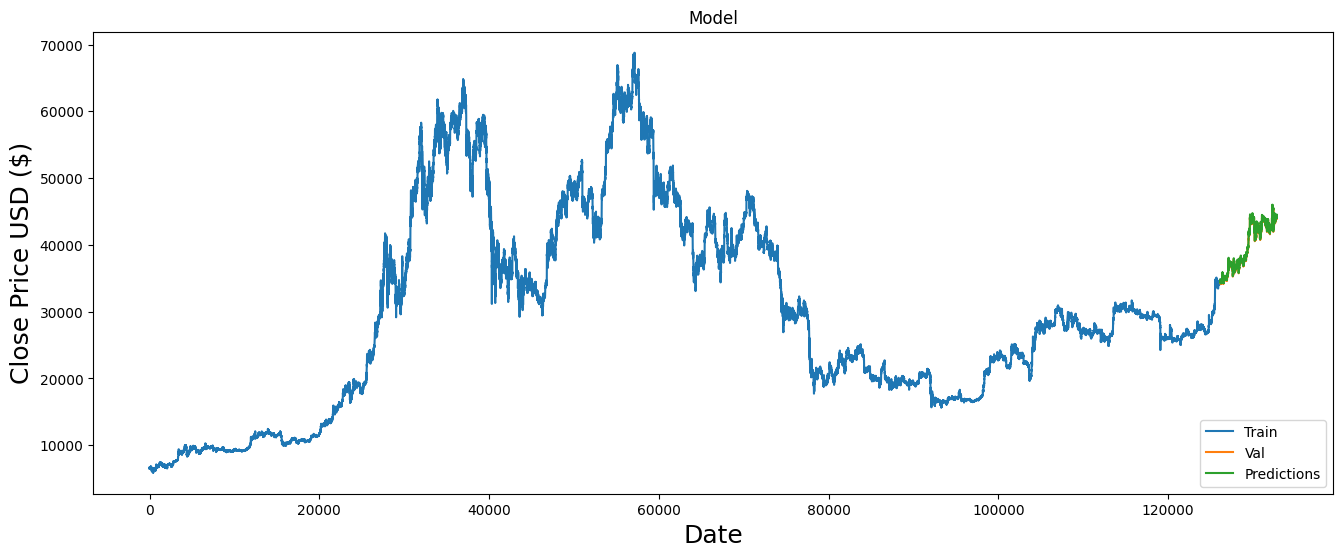

<Figure size 640x480 with 0 Axes>

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions



plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
